In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import os
import sys

In [3]:
notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
data_dir = os.path.join(project_dir, 'data')

### Importing the data 

In [4]:
clean_field_df = pd.read_csv(os.path.join(data_dir, 'clean_field_data.csv'))
clean_field_df.set_index('Field_ID', inplace=True)
clean_field_df.head(10)

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield,Weather_station
Field_ID,,,,,,,,,,,,,,,,,,
40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964,4
30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302,0
39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647,0
5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348,1
14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076,1
5304,850.56647,-2.050665,-7.132769,Rural_Kilimani,50.451250,649.4,-3.0,29.5,13.25,0.70,Sandy,5.484350,1.275280e-01,1.7,1.112611,potato,0.654477,1
429,331.35538,-13.409517,-6.722849,Rural_Hawassa,5.907423,1586.0,-6.8,31.8,12.50,0.63,Silt,7.061317,4.315457e-07,2.9,0.994325,banana,0.342871,2
672,790.73846,-3.785356,-1.470468,Rural_Kilimani,15.380596,1188.3,-3.0,31.0,14.00,0.63,Sandy,4.577043,6.131074e-01,1.4,0.558899,tea,0.399214,3
26124,742.72180,-10.237509,-0.736216,Rural_Sokoto,3.431843,2143.3,-2.6,28.2,12.80,0.66,Volcanic,5.447321,2.784792e-01,13.9,8.532665,coffee,0.613861,0


Now lets split the data into training and testing data. We set 20% of the data into test data.
At this time we just wanted to see the signficance of numeric columns on the standard yield. 

In [18]:
numeric_df = clean_field_df.select_dtypes(include=[np.number])
numeric_df.reset_index(inplace = True)
numeric_df.drop('Field_ID', axis = 1, inplace = True)
X = numeric_df.drop('Standard_yield', axis =1)
y = numeric_df['Standard_yield']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.head(3)

,Elevation,Latitude,Longitude,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,pH,Pollution_level,Plot_size,Annual_yield,Weather_station
670,644.6085,-7.317820,-1.970481,3.717101,1186.7,-4.4,30.8,13.2,0.59,5.659775,5.764306e-01,14.1,7.242818,0
3484,431.6474,-13.855581,-6.700326,3.211858,1573.0,-5.9,30.7,12.4,0.62,6.361063,3.918987e-08,12.1,6.092387,2
2767,762.7562,-7.489036,-0.488462,9.095326,1553.8,-3.0,33.6,15.3,0.64,5.275695,4.634201e-01,4.9,1.881920,0


In [21]:
# train linear regression model
LM1 = LinearRegression()
LM1.fit(X_train, y_train)

print(LM1)

LinearRegression()


In [22]:
y_pred = LM1.predict(X_test)

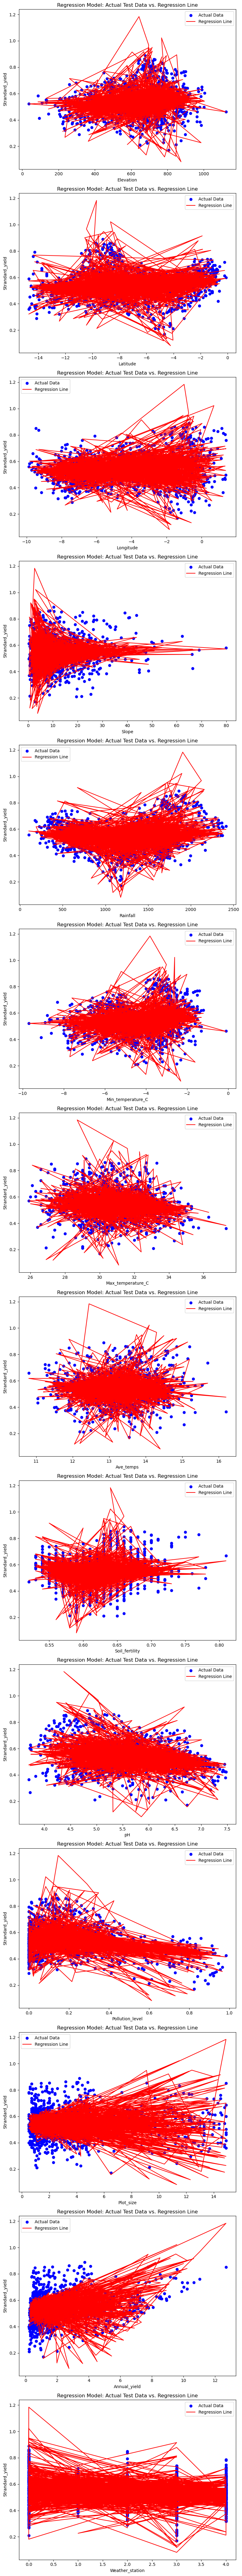

In [23]:
# now let's explore the distribution of the data our prediction. 
num_plots = len(X_test.columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6*num_plots))

for i, col in enumerate(X_test.columns):
    axes[i].scatter(X_test[col], y_test, color='blue', label='Actual Data')
    axes[i].plot(X_test[col], y_pred, color='red', label='Regression Line')

    # Add labels and title
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Strandard_yield')
    axes[i].set_title('Regression Model: Actual Test Data vs. Regression Line')
    axes[i].legend()
plt.tight_layout()
plt.show()

### The graphs doesn't refelect much since multiple variables are used to train. 
##   Model evaluation 

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2_s  = r2_score(y_test, y_pred)

print(f'mean square error: {mse} \nThe R square value is: {r2_s}')

mean square error: 0.004986084480428942 
The R square value is: 0.6258217631212954


- We will use the mean square error to compare this simple linear regression model to the future models.
- The R square value is quite good.

Now let's see other multiple linear regression models using stats model and see the signficance of each predictor variables.


In [25]:
import statsmodels.api as sm

# Fit the linear regression model
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()


In [26]:
y_prediction_ols = ols_model.predict(sm.add_constant(X_test))

# lets evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 score):", r2)

Mean Squared Error (MSE): 0.004986084480428942
R-squared (R2 score): 0.6258217631212954


We can see the `LM1` and `ols_model` have the same mean squared error and the $R^2$ value

In [28]:
# Get the summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Standard_yield   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:11:09   Log-Likelihood:                 5725.4
No. Observations:                4523   AIC:                        -1.142e+04
Df Residuals:                    4509   BIC:                        -1.133e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7214      0.25

### key take aways from the model
- The F-statistic is 528.5, and the associated probability (Prob (F-statistic)) is very close to zero, indicating that the model is statistically significant.
-  A low p-value (typically less than 0.03) suggests that the independent variable is statistically significant. In this output, some variables have low p-values (e.g., 'Longitude', 'pH', 'Pollution_level', 'Plot_size', 'Annual_yield'), indicating their significance in predicting the standard yield.



In [29]:
# Select only the variables with the lowest p-values
selected_variables = ['Pollution_level', 'pH', 'Longitude', 'Annual_yield', 
                      'Weather_station', 'Plot_size', 'Max_temperature_C']

# Extract the selected variables and the target variable
X = numeric_df[selected_variables]
y = numeric_df['Standard_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

LM2 = LinearRegression()
LM2.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:")
for variable, coefficient in zip(selected_variables, LM2.coef_):
    print(f"{variable}: {coefficient}")

# Print the intercept
print(f"Intercept: {LM2.intercept_}")

# print the metrics
y_prediction_lm2 = LM2.predict(X_test)
print(f'\n The mean squared value is: {mean_squared_error(y_test, y_prediction_lm2)} \n The R squared value is: {r2_score(y_test, y_prediction_lm2)}')

Coefficients:
Pollution_level: -0.11062134570815908
pH: -0.012838396100747251
Longitude: 0.0023336267436491424
Annual_yield: 0.12685637589240484
Weather_station: -0.00625964897131729
Plot_size: -0.06754609979600638
Max_temperature_C: -0.002656198286629424
Intercept: 0.7349828331881811

 The mean squared value is: 0.005069201156961283 
 The R squared value is: 0.6195843133544168


The model doesn't improve much from the above. so we have to consider other techniquest to select important features.
lets validate the p-value with the correlation between each dependant variables with the Standard yield

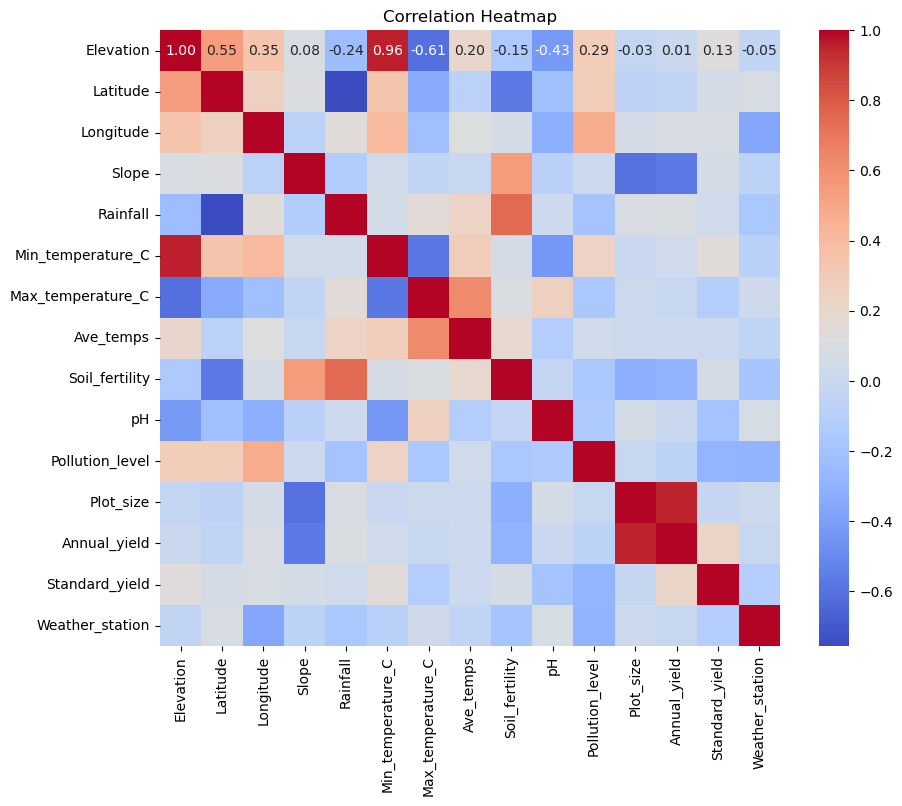

Correlation with Standard_yield:
Pollution_level      0.285761
Annual_yield         0.220812
pH                   0.196613
Min_temperature_C    0.144233
Elevation            0.129248
Weather_station      0.116759
Max_temperature_C    0.111649
Longitude            0.085343
Soil_fertility       0.070205
Latitude             0.061724
Slope                0.056991
Rainfall             0.039217
Plot_size            0.017014
Ave_temps            0.006786
Name: Standard_yield, dtype: float64


In [30]:
correlation_matrix = numeric_df.corr()

# Extract the correlation of each independent variable with the dependent variable
correlation_with_yield = correlation_matrix['Standard_yield'].drop('Standard_yield')

# Sort the correlations by absolute values in descending order
sorted_correlations = correlation_with_yield.abs().sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# List the correlations in descending order
print("Correlation with Standard_yield:")
print(sorted_correlations)

# Analysis of Dependent Variables for Model Training

Based on the provided correlation data and considering a more stringent significance level, we aim to select the top seven independent variables with the highest absolute correlation values with the dependent variable (`Standard_yield`). These variables are likely to have the most significant impact on predicting the yield.

Considering a significance level of 0.01 and the absolute correlation values, the variables worth considering are:

1. **Pollution_level** (Correlation: 0.286)
2. **pH** (Correlation: 0.197)
3. **Min_temperature_C** (Correlation: 0.144)
4. **Elevation** (Correlation: 0.129)
5. **Weather_station** (Correlation: 0.117)
6. **Longitude** (Correlation: 0.085)
7. **Slope** (Correlation: 0.057)

These seven variables have the highest absolute correlation values with `Standard_yield` and may have significant predictive power based on their correlation with the dependent variable. 

Other variables with lower correlation values, such as `Max_temperature_C`, `Soil_fertility`, and `Latitude`, may not be as strongly associated with `Standard_yield` and might not contribute significantly to the predictive power of the model.

It's essential to consider both the correlation values and the significance level when selecting variables for model training to ensure the model's reliability and interpretability.


In [34]:
# Define the highly correlated variables with yield prediction

highly_correlated_variables = ['Pollution_level', 'Annual_yield', 'pH', 
                               'Min_temperature_C', 'Elevation', 'Weather_station',
                               'Max_temperature_C', 'Longitude']

# Extract the highly correlated variables and the target variable
X = numeric_df[highly_correlated_variables]
y = numeric_df['Standard_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
LM3 = LinearRegression()
LM3.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:")
for variable, coefficient in zip(highly_correlated_variables, LM3.coef_):
    print(f"{variable}: {coefficient}")

# Print the intercept
print(f"Intercept: {LM3.intercept_}")

# print the metrics
y_prediction_lm3 = LM3.predict(X_test)
print(f'\n The mean squared value is: {mean_squared_error(y_test, y_prediction_lm3)} \n The R squared value is: {r2_score(y_test, y_prediction_lm3)}')

Coefficients:
Pollution_level: -0.22999305792934246
Annual_yield: 0.010484014390108874
pH: -0.021860141853956648
Min_temperature_C: -0.023257723807522886
Elevation: 0.00027159277246750237
Weather_station: -0.014731638177567542
Max_temperature_C: -0.0018939088876881102
Longitude: 0.005515749042459978
Intercept: 0.5212360727630201

 The mean squared value is: 0.00962957724259822 
 The R squared value is: 0.2773531518237079


# Exploration of Ensemble Techniques for Model Improvement

After training linear regression models with the selected independent variables based on their correlation and significance level, we observed that the model's performance did not show significant improvement in predicting the `Standard_yield`. Despite considering variables with the highest absolute correlation values and low p-values, the linear regression models may not capture the complex relationships between the independent and dependent variables.

To address this limitation and potentially improve the model's predictive power, we will explore ensemble techniques. Ensemble methods combine multiple models to produce better predictive performance than individual models. By leveraging the diversity of different models, ensemble techniques can capture more complex patterns in the data and reduce the risk of overfitting.

We will explore the following ensemble techniques:

1. Random Forest Regression
2. Gradient Boosting Regression

These ensemble methods are known for their ability to handle complex datasets and capture nonlinear relationships between variables. By incorporating ensemble techniques into our modeling approach, we aim to enhance the predictive performance of the model and provide more accurate estimates of `Standard_yield`.
